In [1]:
import csv
import os
import pandas as pd
import pandas as pd
import geopandas as gpd
import json
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')
import os
import sys
sys.path.append('../../code')
import matplotlib.pyplot as plt
import datetime

In [2]:
gdfs = []
dfs= []

from helpers.load_routes import load_routes
load_routes(gdfs, dfs)

In [3]:
all_routes_gdf = gpd.GeoDataFrame(pd.concat(gdfs))
from helpers.calculate_routes import calculate_routes

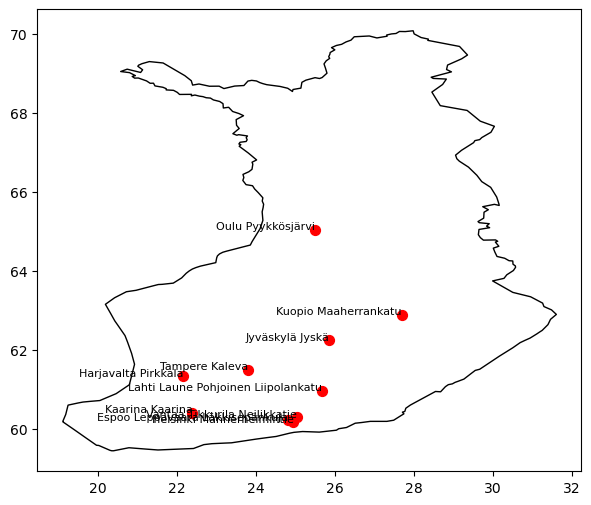

In [4]:
stations = [
        {
        "name": "Espoo Leppävaara Läkkisepänkuja",
        "coordinates": [60.22024, 24.81133]
    },    {
        "name": "Harjavalta Pirkkala",
        "coordinates": [61.33169, 22.14330]
    },    {
        "name": "Helsinki Mannerheimintie",
        "coordinates": [60.16964, 24.93924]
    },    {
        "name": "Jyväskylä Jyskä",
        "coordinates": [62.24150, 25.84150]
    },    {
        "name": "Kaarina Kaarina",
        "coordinates": [60.40831, 22.37835]
    },    {
        "name": "Kuopio Maaherrankatu",
        "coordinates": [62.89334, 27.68688]
    },    {
        "name": "Lahti Laune Pohjoinen Liipolankatu",
        "coordinates": [60.96704, 25.65489]
    },
        {
        "name": "Oulu Pyykkösjärvi",
        "coordinates": [65.04338, 25.49790]
    },
        {
        "name": "Tampere Kaleva",
        "coordinates": [61.49910, 23.80221]
    },
            {
        "name": "Vantaa Tikkurila Neilikkatie",
        "coordinates": [60.28995, 25.03953]
    },

]
stations_df = pd.DataFrame(stations)
stations_df['geometry'] = stations_df['coordinates'].apply(lambda x: Point(x[1], x[0]))  # Note the order: (longitude, latitude)
stations_gdf = gpd.GeoDataFrame(stations_df, geometry='geometry')


finland = gpd.read_file('../data/suomi.geojson')


ax = finland.plot(figsize=(10, 6), color='white', edgecolor='black')


stations_gdf.plot(ax=ax, color='red', markersize=50)


for x, y, label in zip(stations_gdf.geometry.x, stations_gdf.geometry.y, stations_gdf['name']):
    plt.text(x, y, label, fontsize=8, ha='right')

plt.show()


In [5]:

for station in stations: 
    lon = station["coordinates"][1]
    lat = station["coordinates"][0]
    geometry = [Point(lon, lat)]
    city_gdf = gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326")
    city_3067 = city_gdf
    routes_3067 = all_routes_gdf

    cols = routes_3067.columns
    city_routes = pd.DataFrame(columns=cols)

    city_routes["1000m"] = ""
    city_routes["500m"] = ""
    city_routes["100m"] = ""


    calculate_routes(routes_3067, city_3067, city_routes)
    datetime.date.today()
    date = datetime.date.today()
    export = city_routes
    export.to_csv(f"./route_data/{station['name']}_{date}.csv", index=False)